In [12]:
# !pip install top2vec
# !pip install top2vec[sentence_encoders]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 674.8 kB/s eta 0:00:00m eta 0:00:010:00:12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 1.2 MB/s eta 0:00:001.3 MB/s eta 0:00:01
  Using cached libclang-14.0.1-py2.py3-none-manylinux1_x86_64.whl (14.5 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached termcolor-1.1.0-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-text 0.4.2 requires scikit-learn<1.1,>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
autogluon-text 0.4.2 requires transformers<4.17.0,>=4.16.2, but you have transformers 4.15.0 which is incompatible.
autogluon-core 0.4.2 requires protobuf<3.21,>=3.20, but you have protobuf 3.19.4 which is incompatible.
autogluon-core 0.4.2 requires scikit-learn<1.1,>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [1]:
import pandas as pd 
import numpy as np
import spacy
from stop_words import get_stop_words
import re

In [2]:
path = "../../data/"

In [3]:
data = pd.read_csv(path + 'twint_emotion.csv', index_col = 0)

In [4]:
nlp_it = spacy.load("it", disable=['parser', 'ner'])

In [5]:
# Language dictionary for scipy language format
dict_spacy = {"ITA" : nlp_it}

In [6]:
# def remove_stopwords(text, language, stop_words = []):
#     nlp = spacy.load(language, disable=['parser', 'ner'])
#     doc = nlp(text.lower())
#     filtered = []
#     for token in doc:
#         if token.text not in stop_words and token.is_alpha and not token.is_stop:
#             filtered.append(token)
#     return " ".join([token.text for token in filtered])

# def lemmatize_pos_filter(text, language, pos):
#     nlp = spacy.load(language, disable=['parser', 'ner'])
#     doc = nlp(text.lower())
#     filtered = []
#     for token in doc:
#         if token.pos_ in pos:
#             filtered.append(token)
#     return [token.lemma_ for token in filtered]

def tokenize(texts):
    """
    Tokenizes a list of texts, returning a list of tokens.
    """
    token_texts = []
    for text in texts:
        token_texts.append(simple_preprocess(text, deacc=True))
    return token_texts
     
def preprocess_text(text, nlp, stop_words = [], pos = ['PROPN', 'NOUN', 'VERB', 'ADJ']):
    """
    Performs preprocessing on a text through spaCy, langauge based on nlp parameter.
    Filter default stopword plus those in the list stop_words,
    accepts only word with POS tag in the pos list,
    filters out non-alpha words, performs lemmatization.
    Returns a list of lemmatized, filtered tokens for the text.
    """
    doc = nlp(text.lower())
    tokens = []
    for token in doc:
        if token.lemma_ not in stop_words and token.pos_ in pos and not token.is_stop and token.is_alpha:
            tokens.append(token.lemma_)
    return tokens


In [7]:
data.drop(columns = ['Unnamed: 0.1'], inplace = True)

In [8]:
stop_words = get_stop_words('italian')

In [9]:
texts_it = [preprocess_text(text, nlp_it, stop_words=stop_words) for text in data["tweet"]]
# d_it = corpora.Dictionary(texts_it)
# d_it.filter_extremes(no_below=5, no_above=0.5)
# c_it = [d_it.doc2bow(text) for text in texts_it]

In [10]:
list_strings = [" ".join(item) for item in texts_it]

In [11]:
from top2vec import Top2Vec

model = Top2Vec(list_strings, embedding_model='universal-sentence-encoder-multilingual')

2022-07-27 12:07:24.771560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-27 12:07:24.771618: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-27 12:07:35,149 - top2vec - INFO - Pre-processing documents for training
/home/hamza/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-07-27 12:07:37,369 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encod

In [12]:
model.get_num_topics() 

153

In [13]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [15]:
topic_sizes[:10]

array([2435, 1224, 1149, 1091,  617,  616,  601,  585,  507,  501])

In [16]:
np.sum(topic_sizes)

25152

In [17]:
model.get_topics(model.get_num_topics())

(array([['vaccinatevi', 'vaccino', 'vaccinazione', ..., 'cronico',
         'cancro', 'long'],
        ['longcovid', 'longcovidkids', 'long', ..., 'passato', 'migliaio',
         'maggioranza'],
        ['longcovid', 'long', 'longcovidkids', ..., 'invalidare',
         'speranza', 'continuo'],
        ...,
        ['policlinico', 'clinico', 'longcovid', ..., 'trattare',
         'letalita', 'covid'],
        ['omicron', 'lancet', 'studiare', ..., 'intervistare', 'grande',
         'postumo'],
        ['bimbo', 'long', 'miocardite', ..., 'duro', 'cazzo', 'culo']],
       dtype='<U15'),
 array([[0.7125958 , 0.704657  , 0.6918075 , ..., 0.24966845, 0.24666116,
         0.24457046],
        [0.70672923, 0.6367178 , 0.62830055, ..., 0.2981986 , 0.29509765,
         0.29374745],
        [0.42437086, 0.38599074, 0.3494453 , ..., 0.18686816, 0.18617085,
         0.18601543],
        ...,
        [0.2493881 , 0.22331344, 0.21832952, ..., 0.12664442, 0.12576036,
         0.12543277],
        [0.

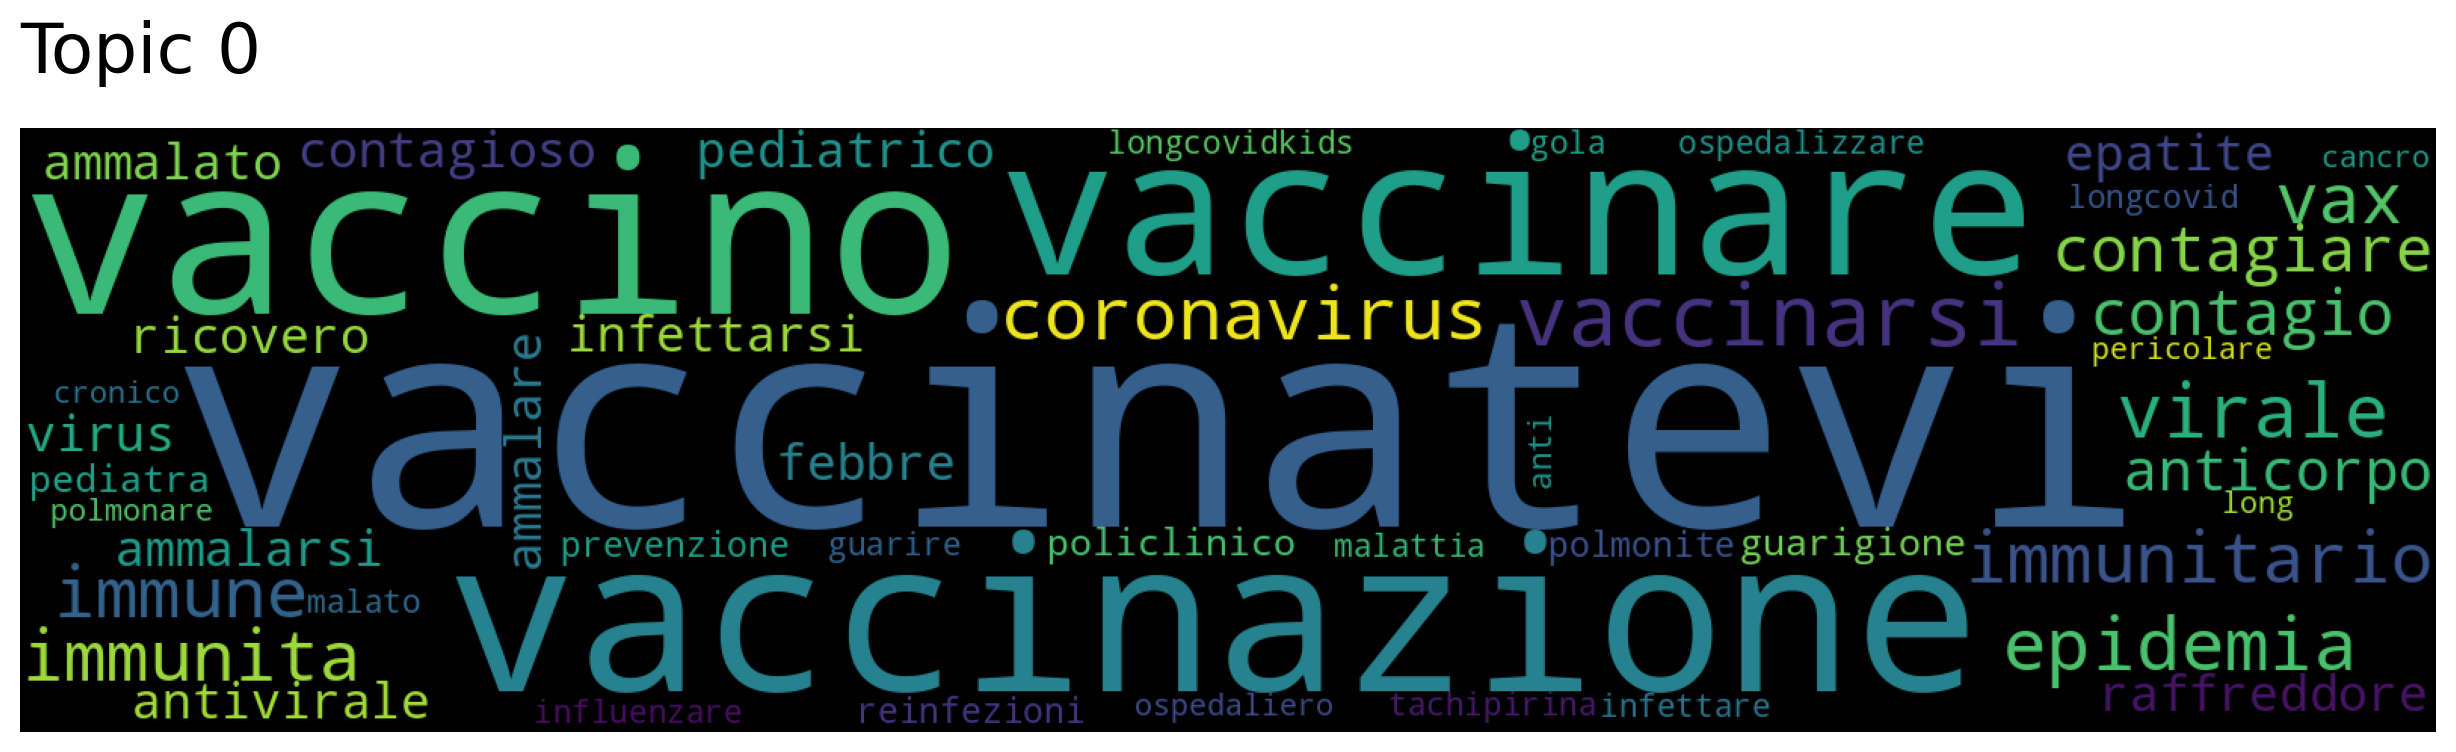

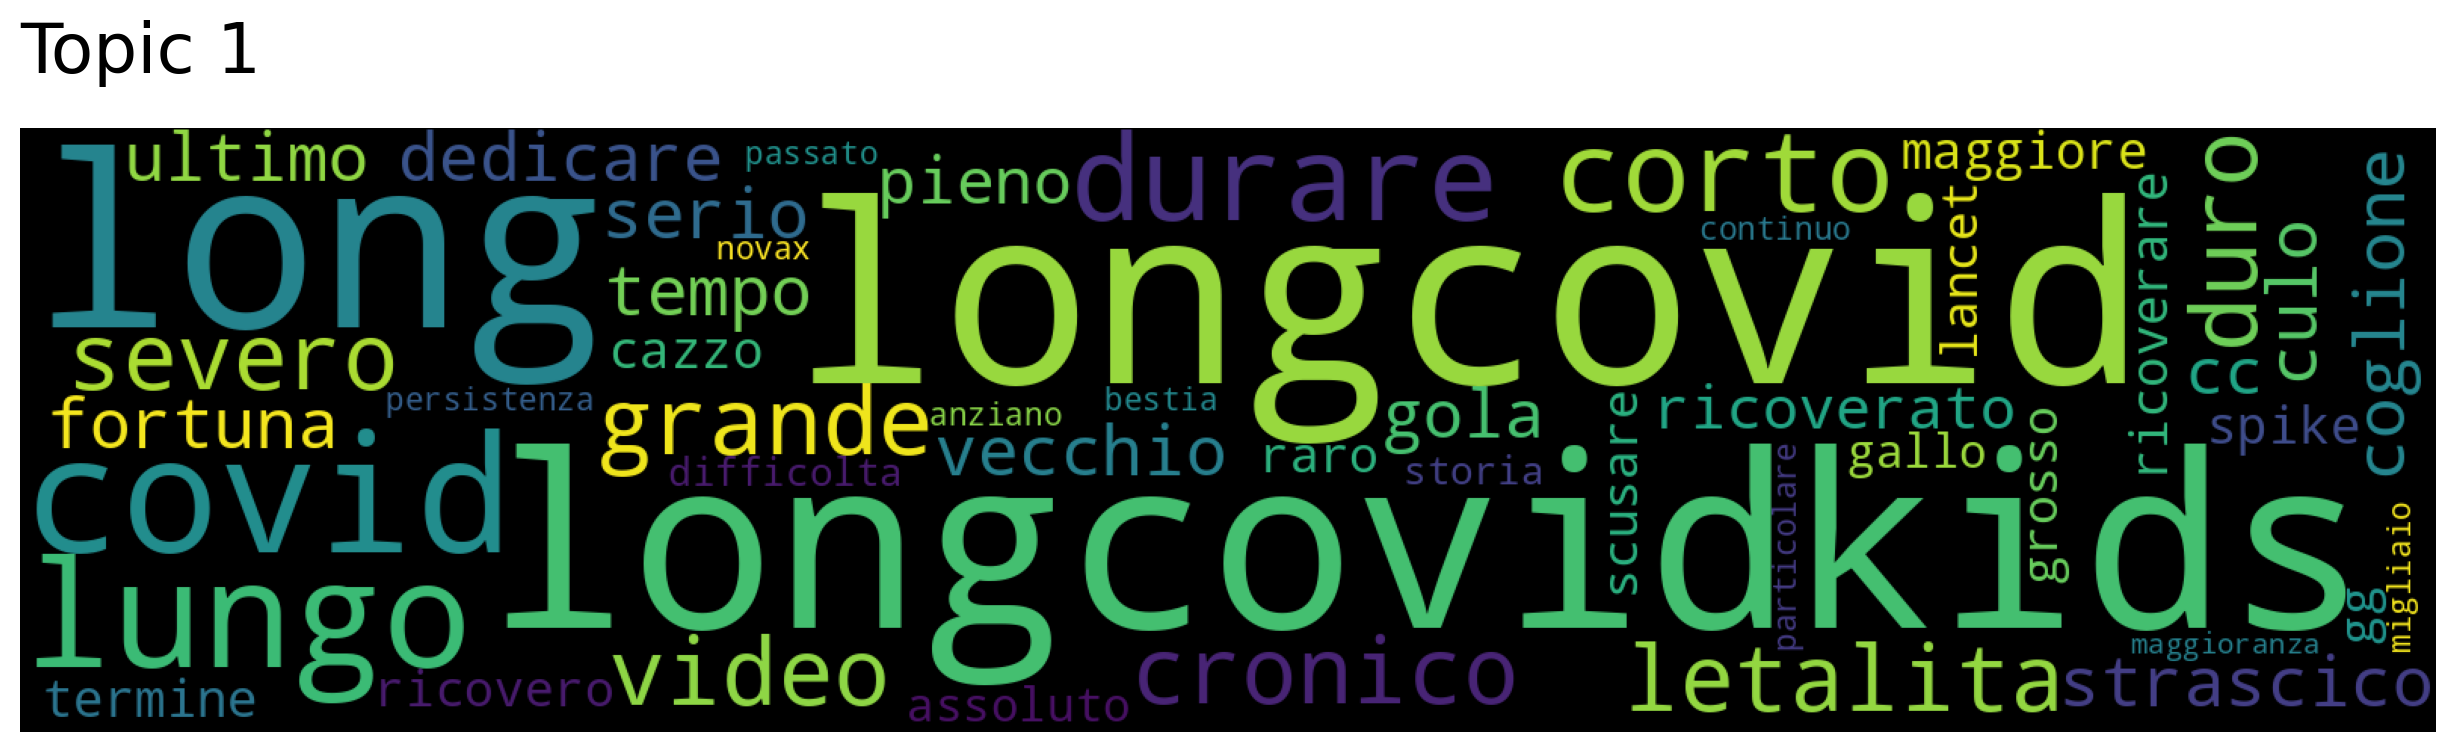

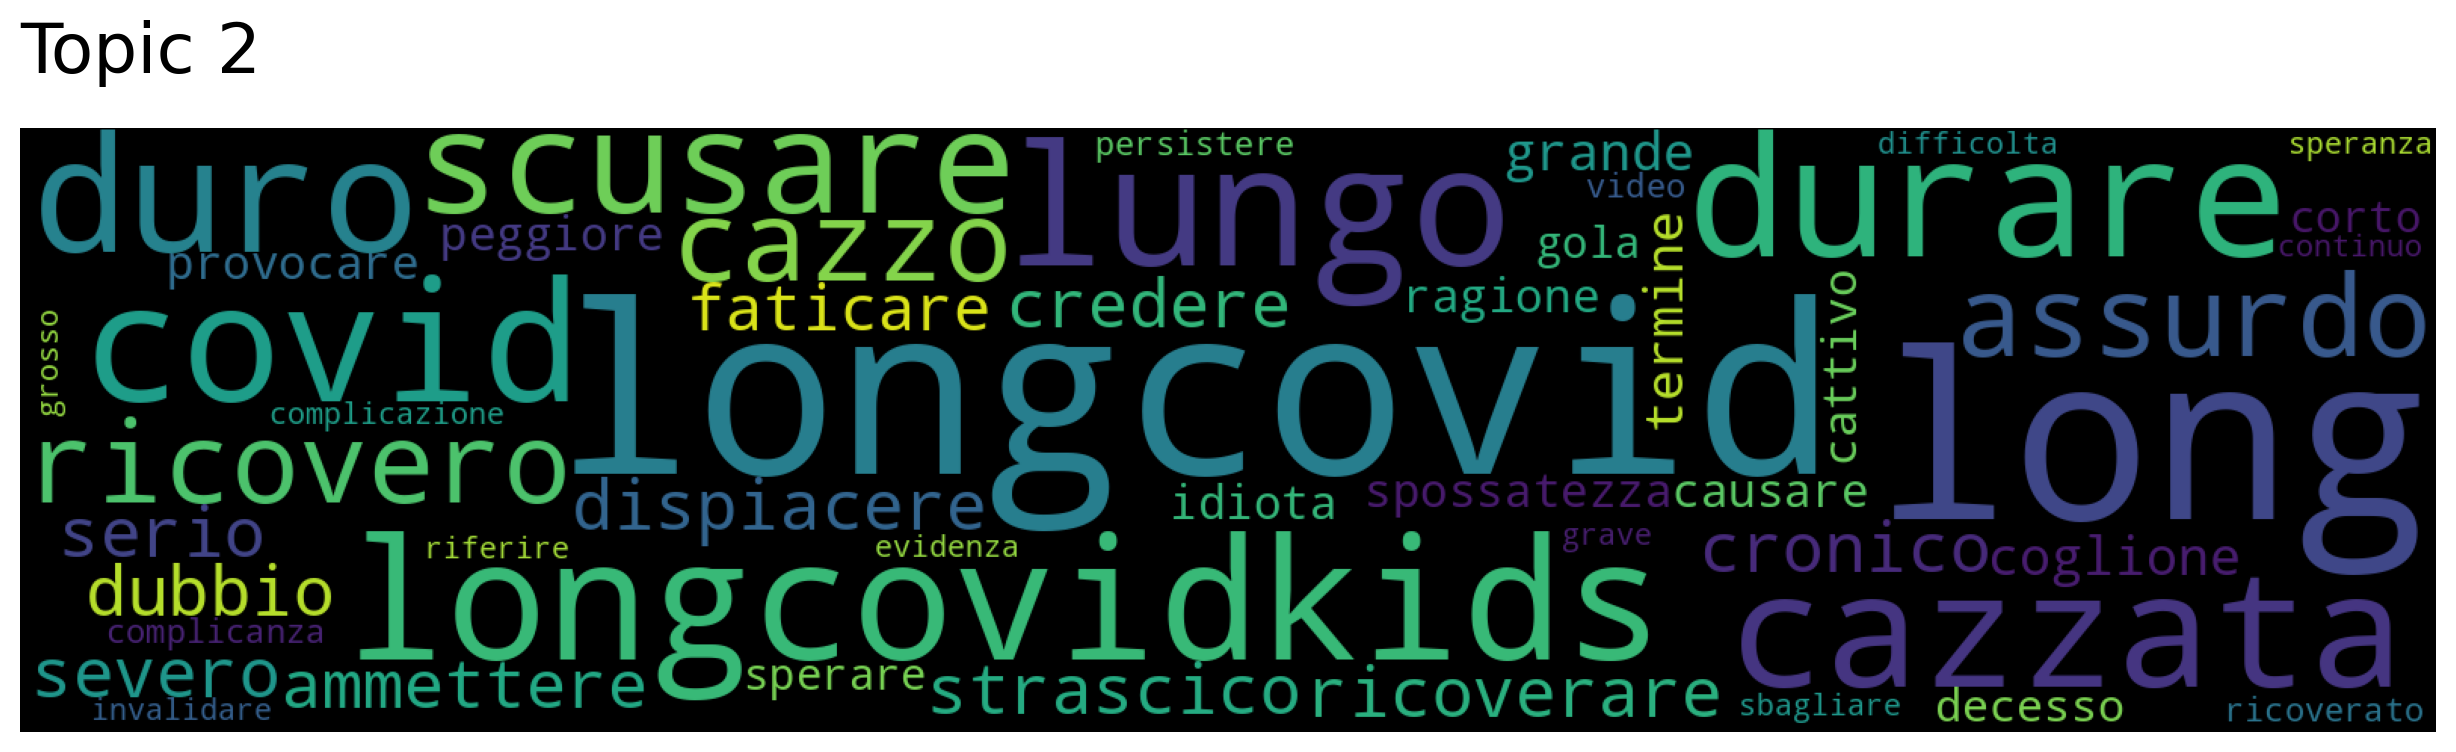

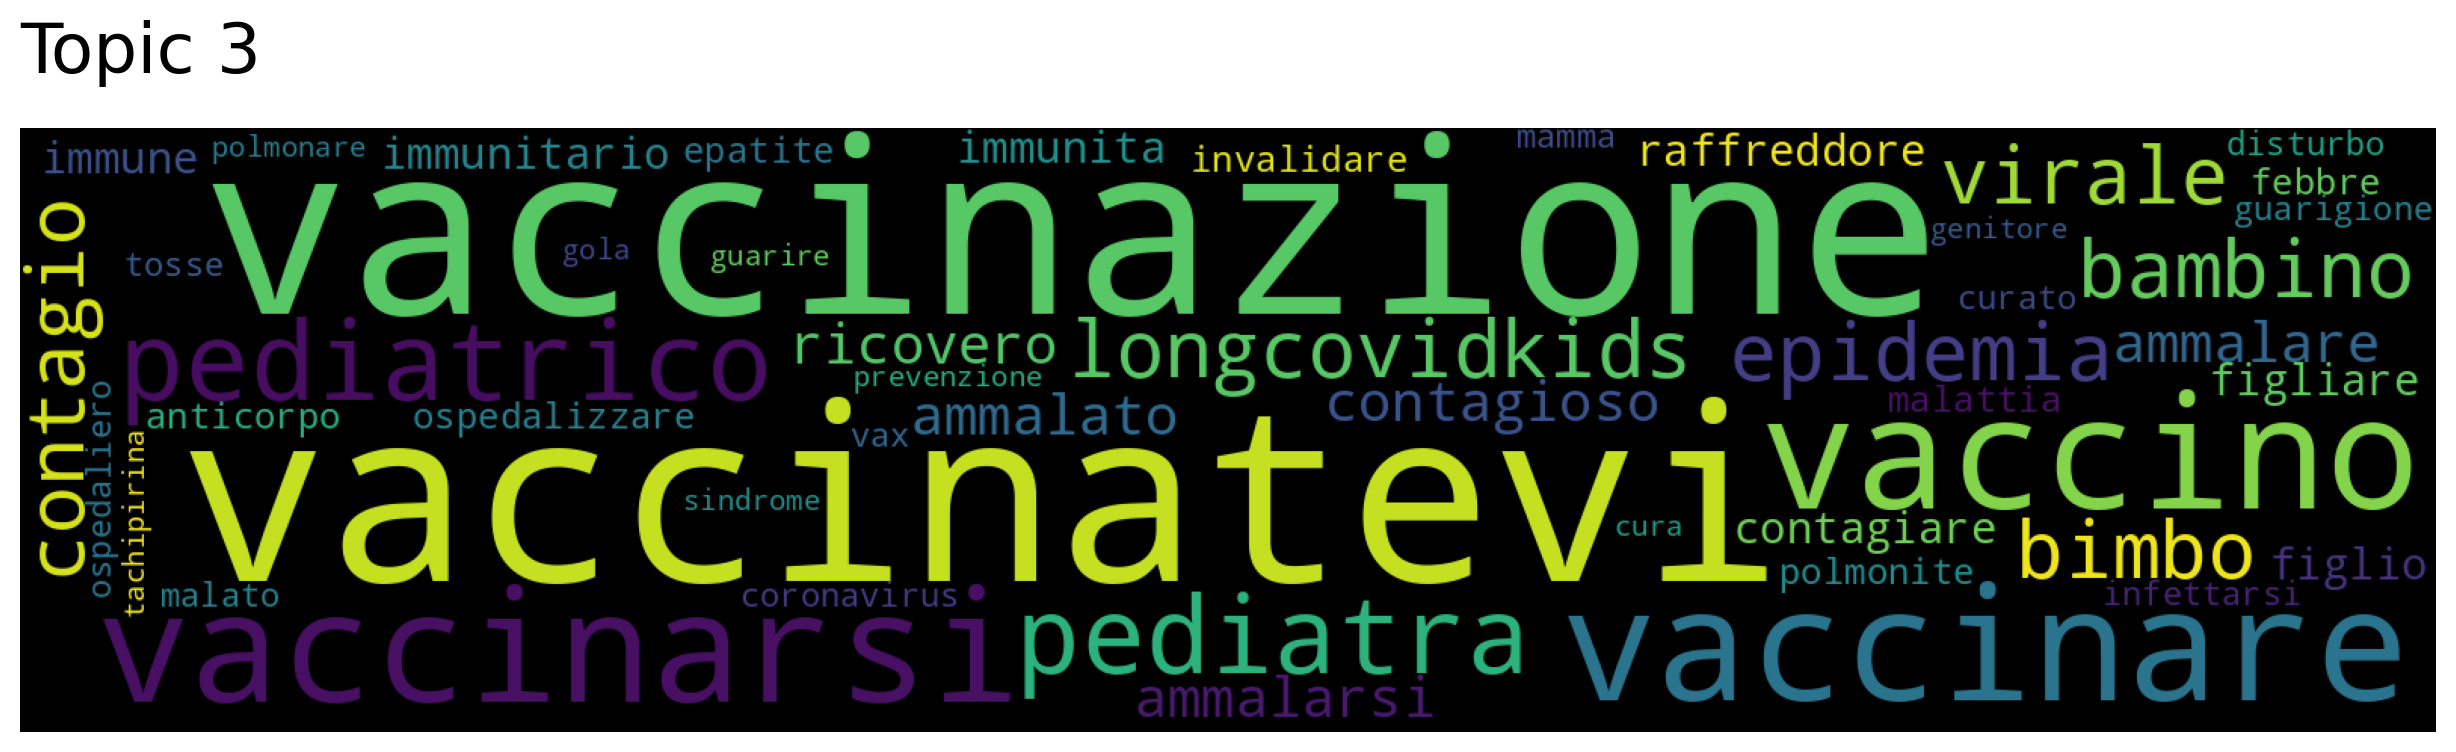

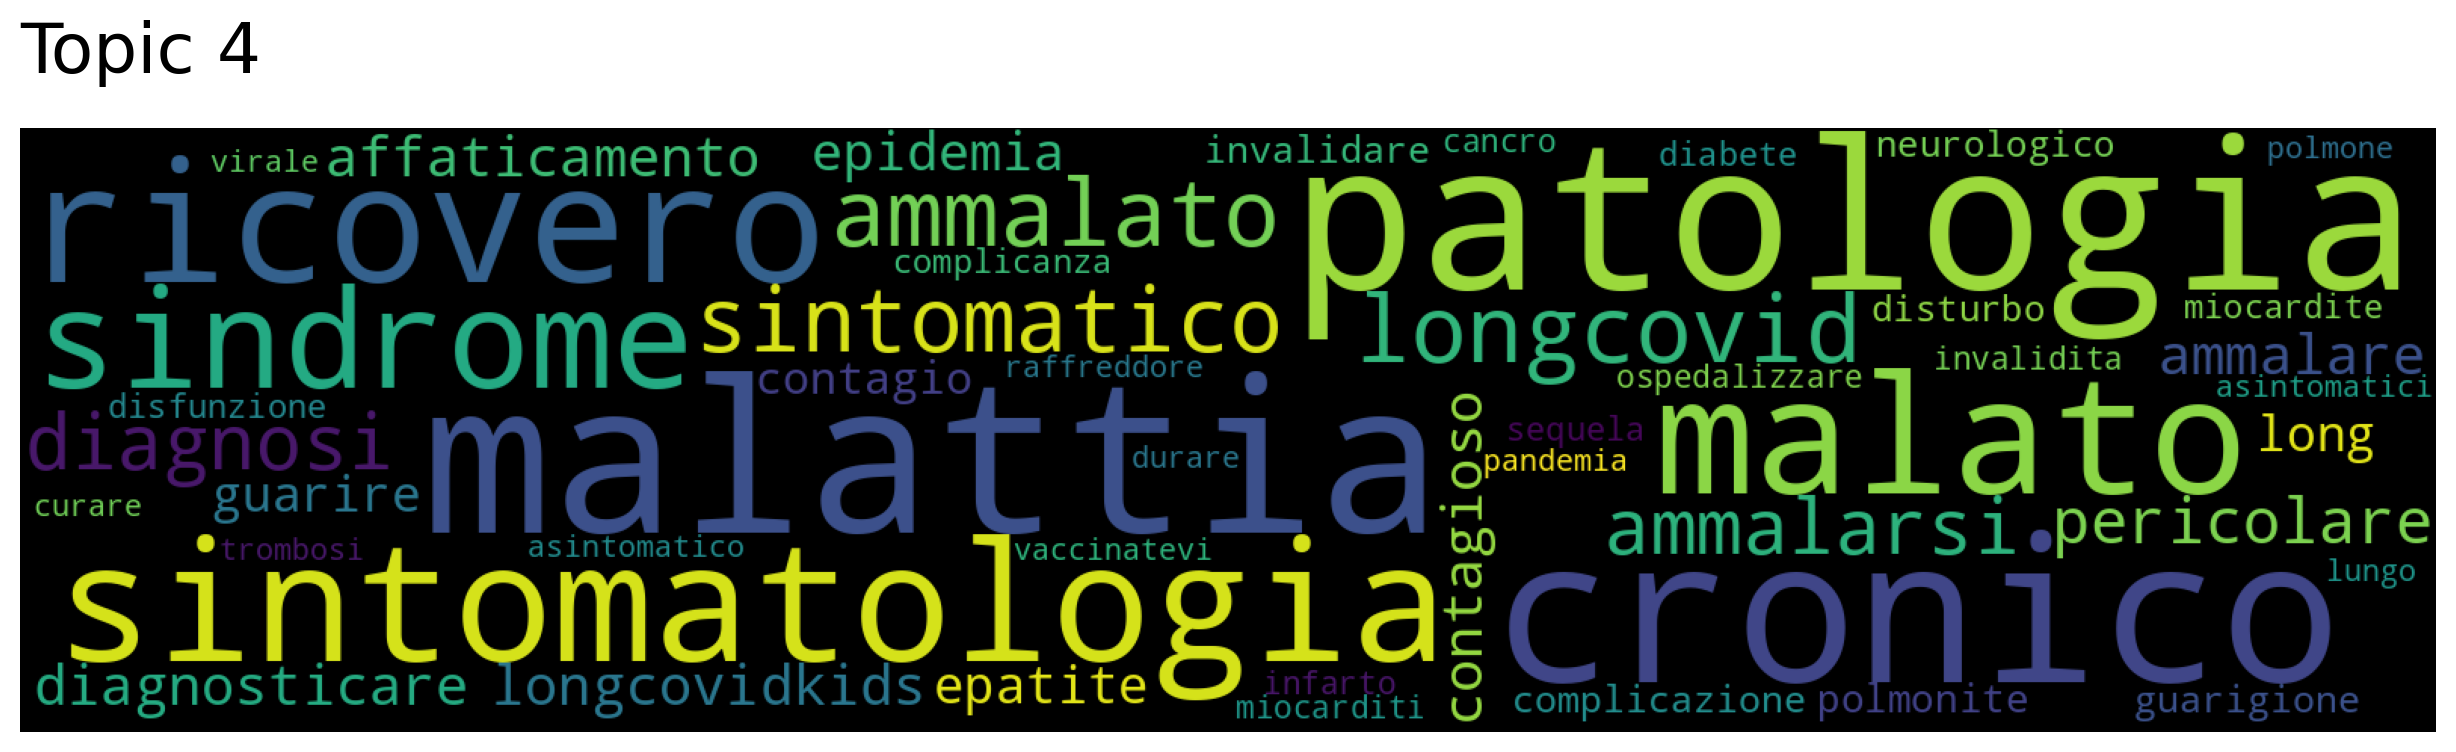

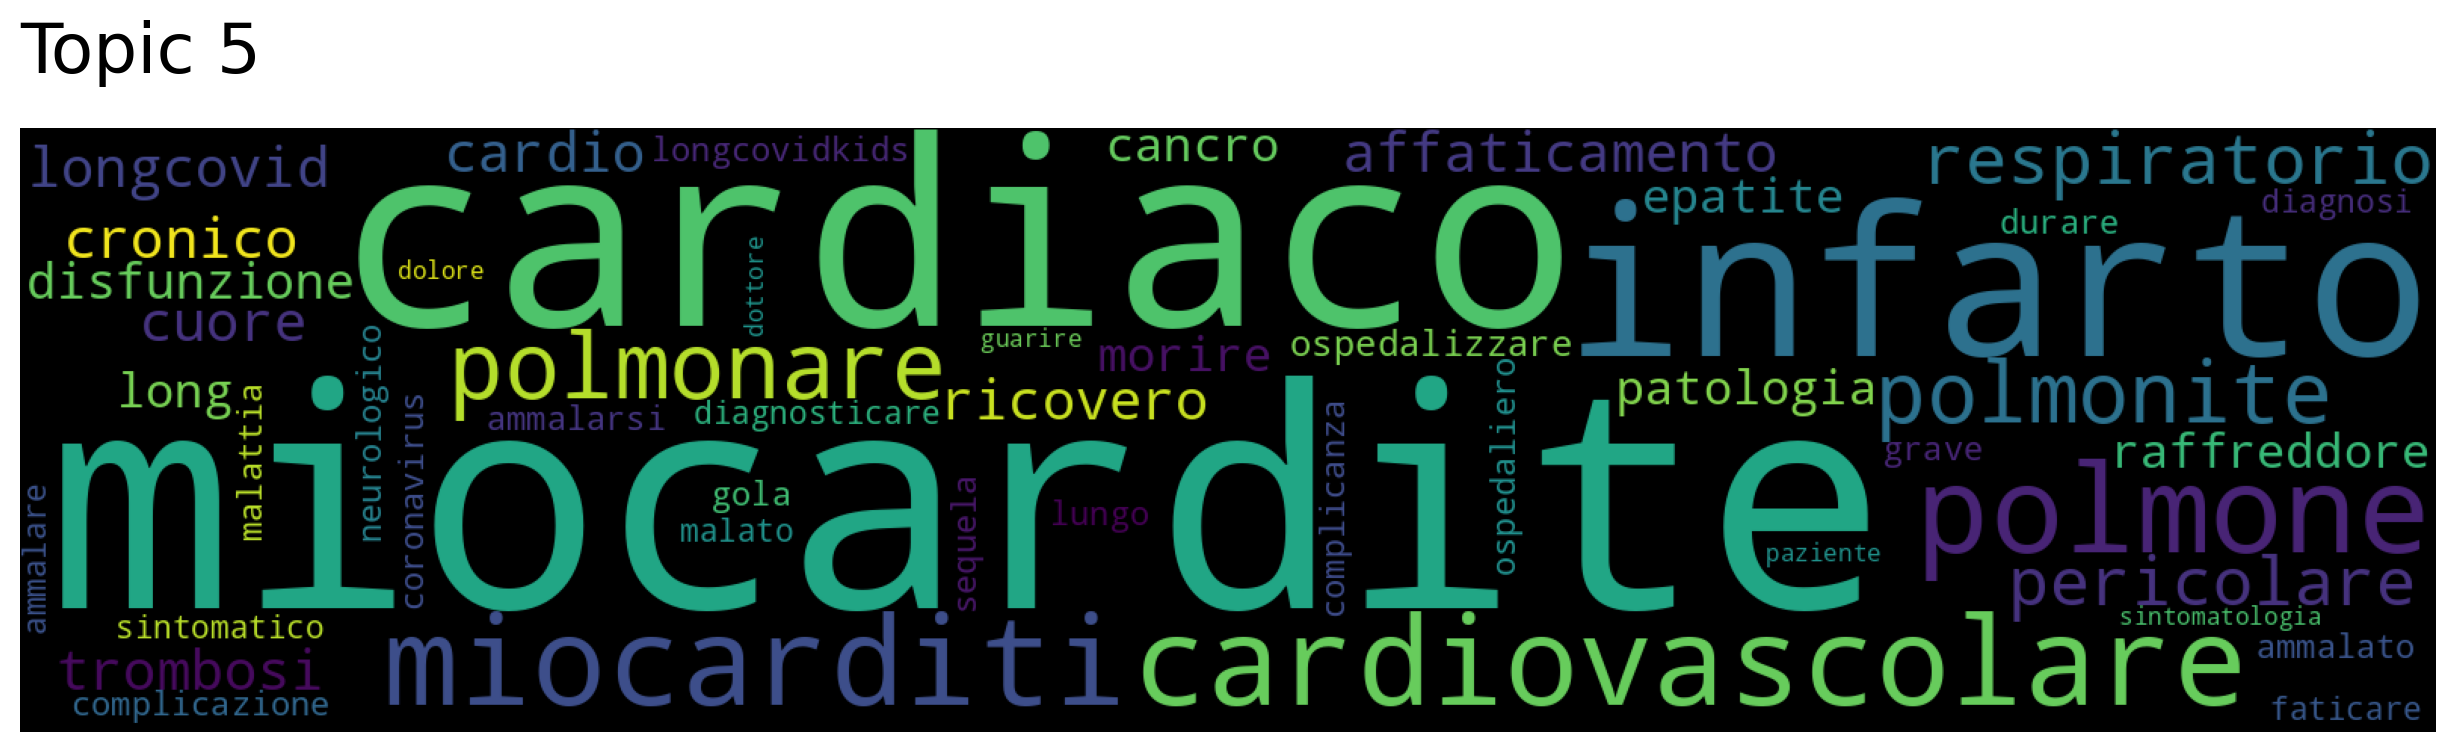

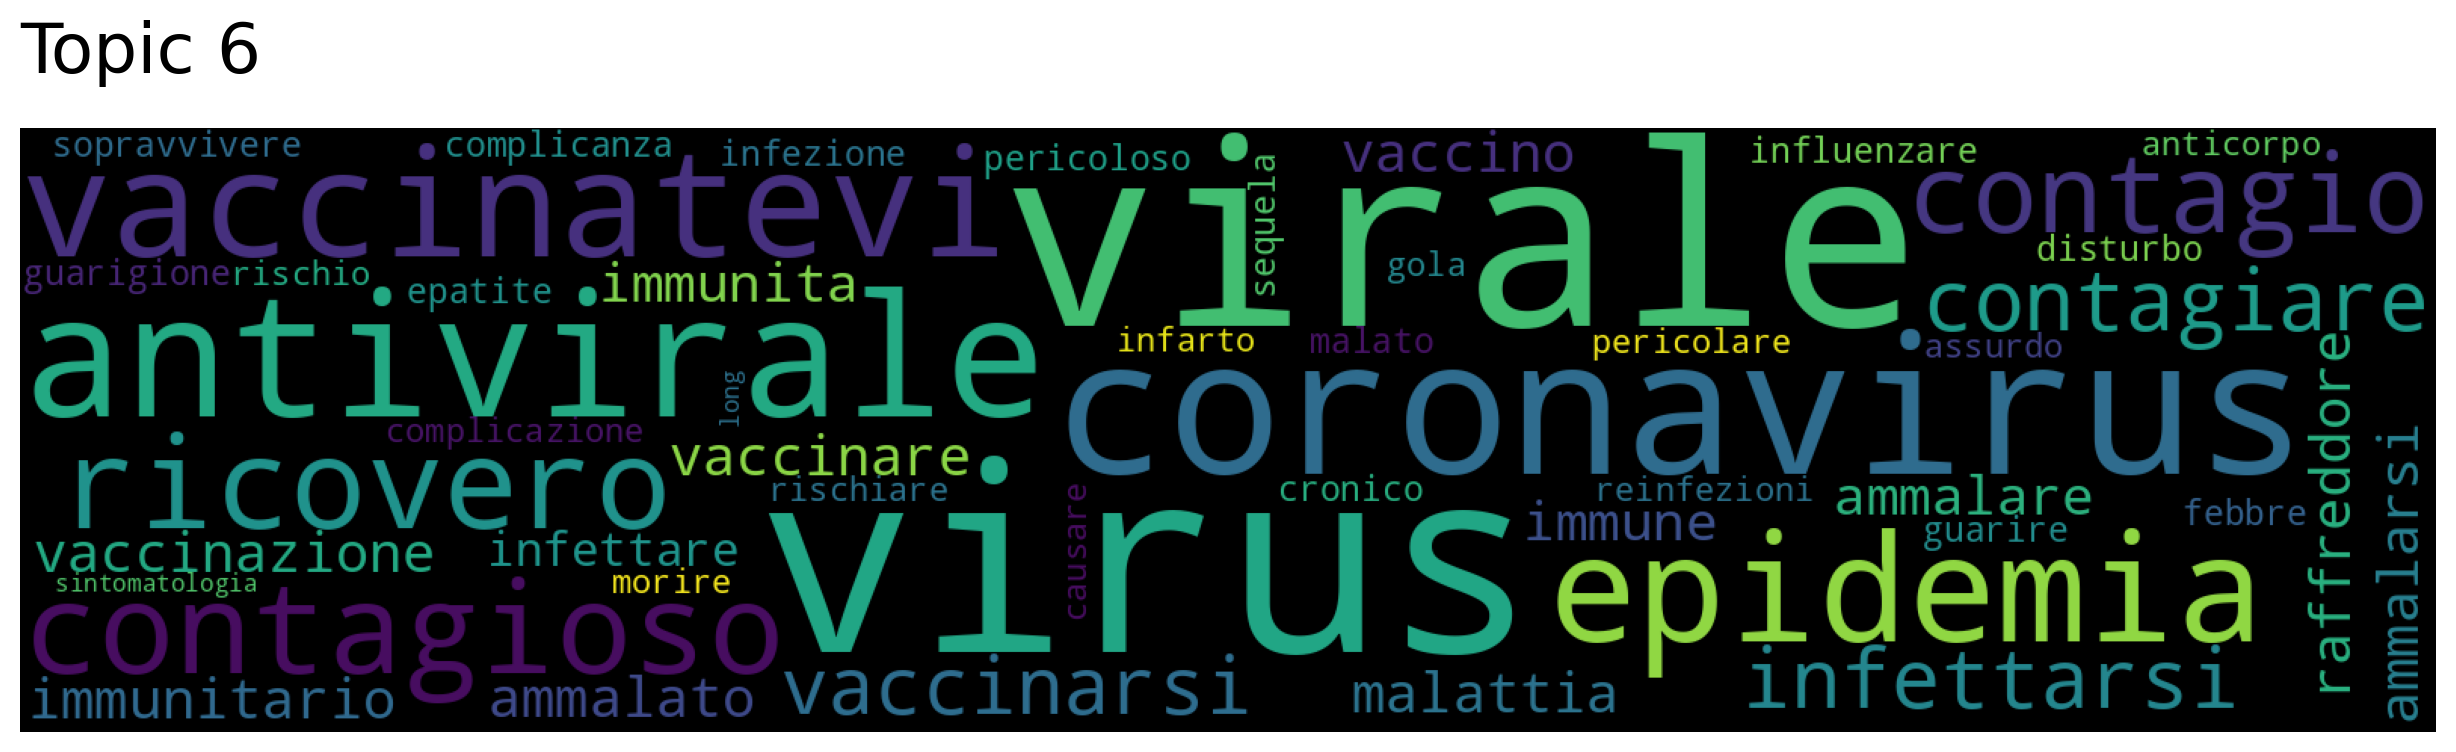

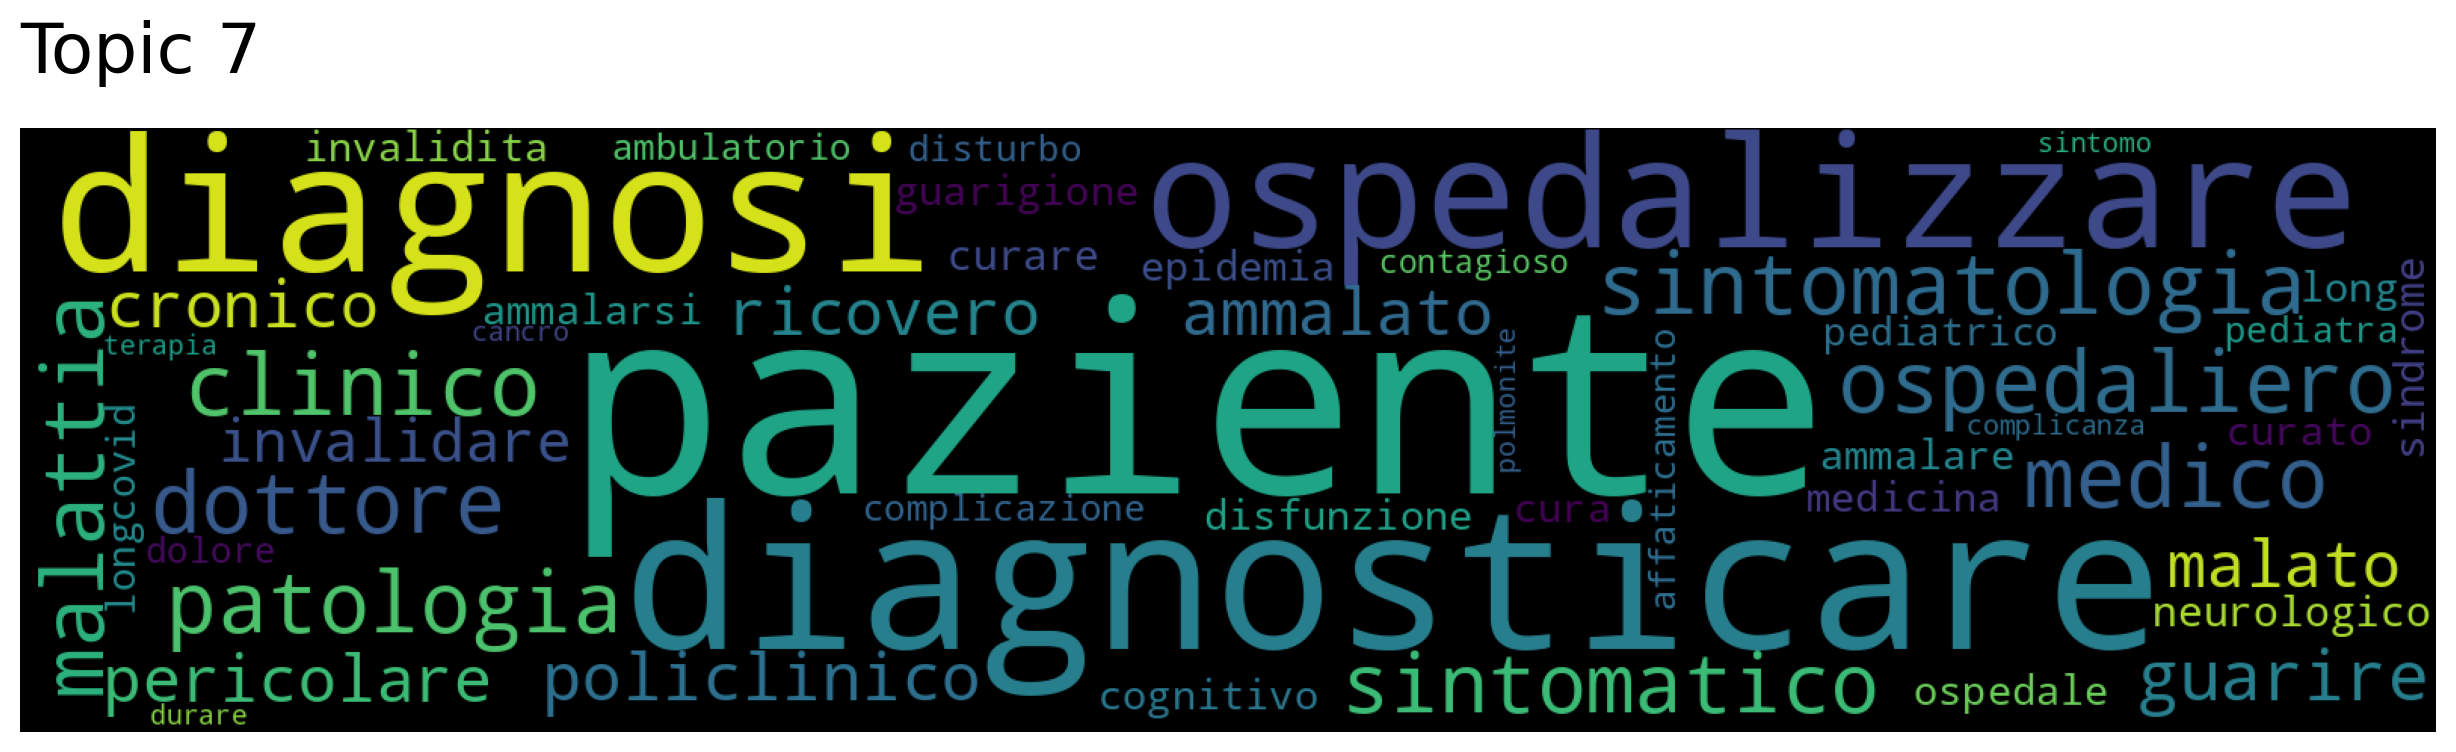

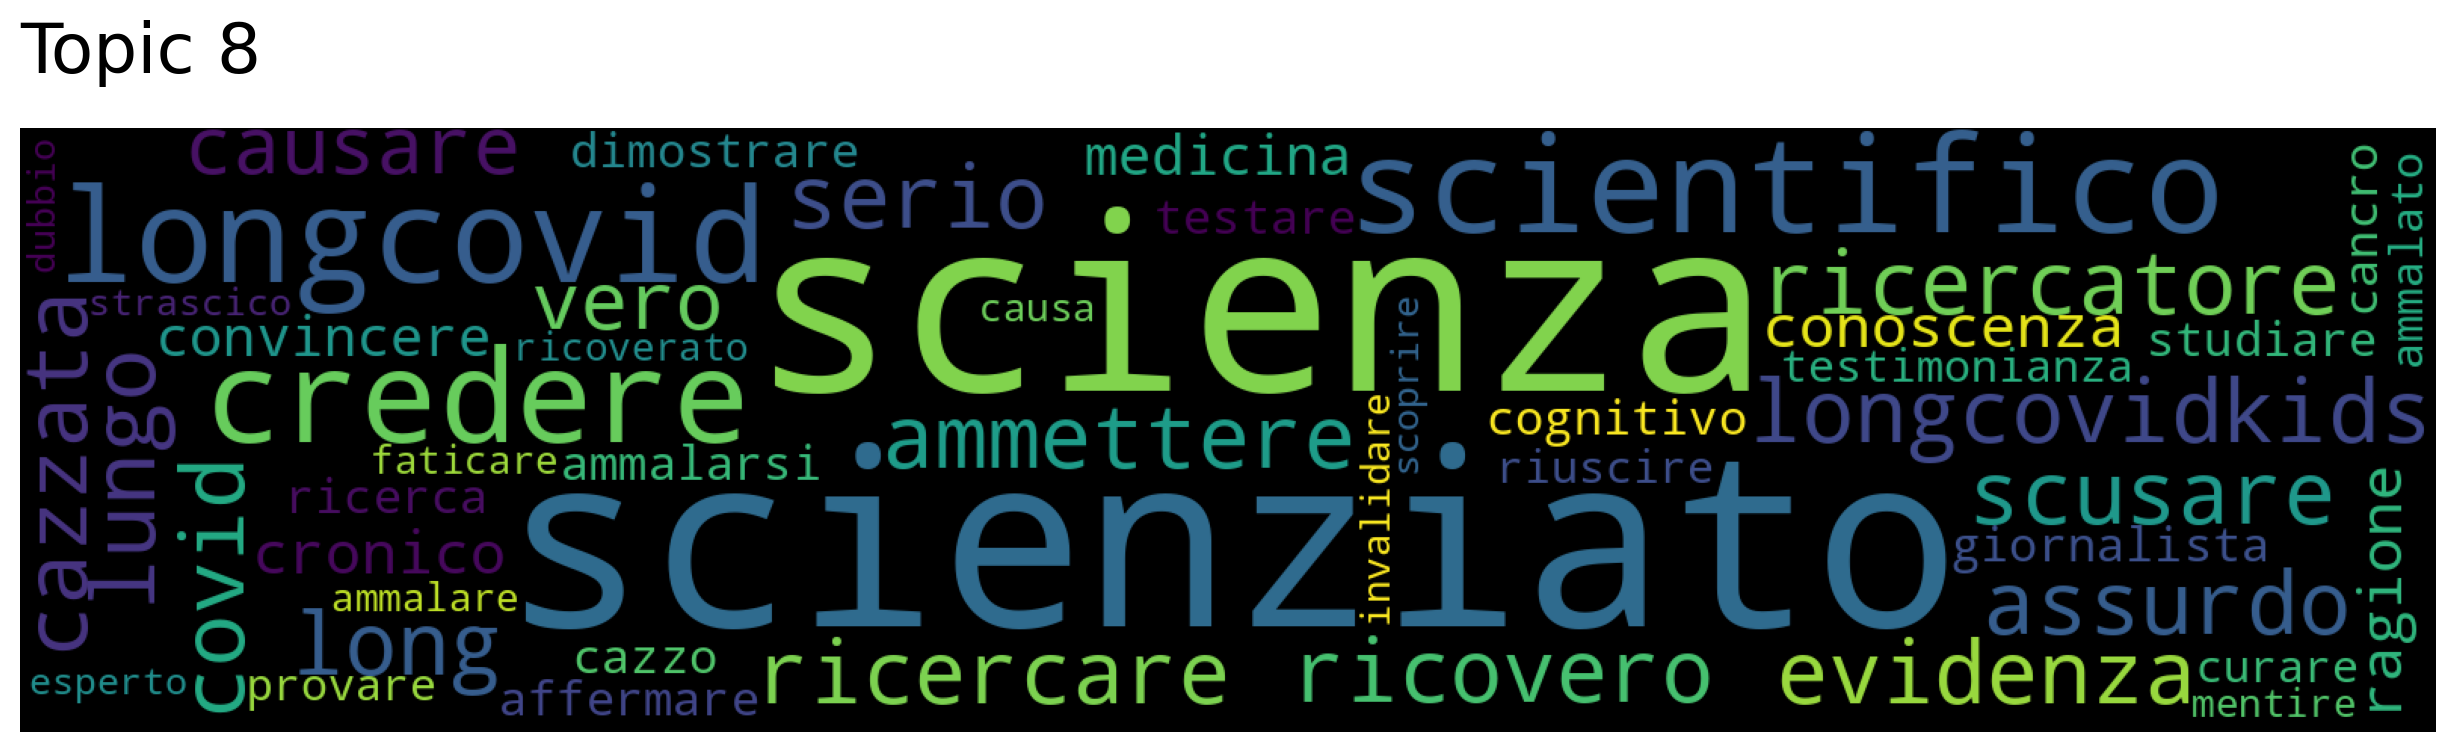

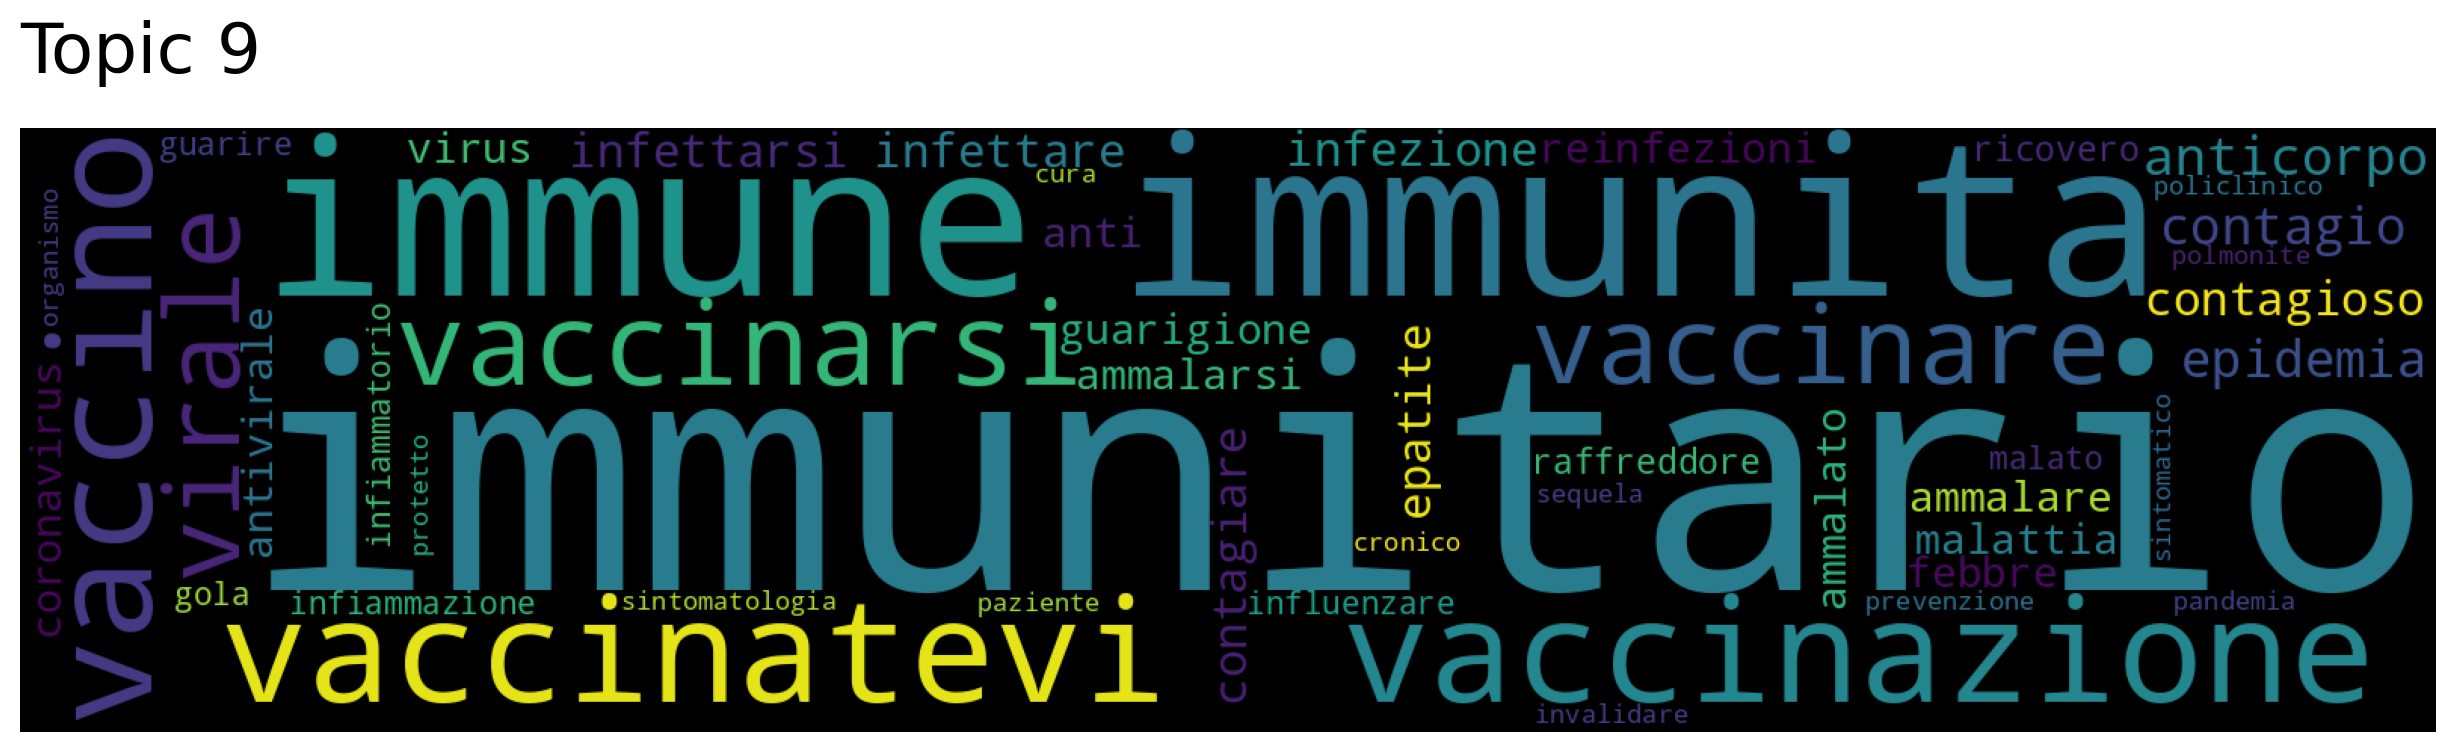

In [19]:
topic_words, word_scores, topic_nums = model.get_topics(model.get_num_topics())
for topic in topic_nums[:10]:
    model.generate_topic_wordcloud(topic)

## Topic 0 

In [23]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 10738, Score: 0.9375967979431152
-----------
long covid causare vaccino sereno malanno vaccinare
-----------

Document: 20289, Score: 0.937368631362915
-----------
long covid essere vaccinare vaccinare
-----------

Document: 13025, Score: 0.9352189302444458
-----------
long covid vaccinare essere vaccino conni
-----------

Document: 24813, Score: 0.9338679313659668
-----------
covidvaccine vaccinare long covid essere vaccinare
-----------

Document: 23, Score: 0.9297369718551636
-----------
long covid colpire vaccinare vaccinare
-----------



## Topic 1

In [24]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 5869, Score: 0.9597532749176025
-----------
essere long covid covid
-----------

Document: 13621, Score: 0.952263593673706
-----------
long covid rincoglionimento
-----------

Document: 17307, Score: 0.952263593673706
-----------
long covid
-----------

Document: 17316, Score: 0.952263593673706
-----------
long covid
-----------

Document: 17329, Score: 0.952263593673706
-----------
long covid
-----------



## Topic 2

In [25]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=2, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 23830, Score: 0.8003595471382141
-----------
long covid uscire studiare long covid essere caso grave duro parlare long covid entrare cacchio discorrere brusaferro
-----------

Document: 2360, Score: 0.7989966869354248
-----------
long covid diffondere esperto affermare covid sintomo termine rivisto chiederci long covid essere brendan neill
-----------

Document: 11796, Score: 0.7978429794311523
-----------
miseria long covid consistere incontrare riferire trattare long covid
-----------

Document: 19826, Score: 0.7950302362442017
-----------
long covid prendere spacciare testare desumere commento idiota passare arguto essere
-----------

Document: 21033, Score: 0.7935529947280884
-----------
guardare long covid esistere parola irrispettoso soffrire long covid
-----------



## Topic 3

In [26]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=3, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 18477, Score: 0.8556987047195435
-----------
locatelli bimbo contagiare presentire long covid vaccinazione offrire strumentare bambino rischiare malattia
-----------

Document: 19440, Score: 0.850712239742279
-----------
nuovo malattia epatico colpire bambino situazione preoccupare covid bambino essere vaccinare rischiare ospedalizzazioni terapia intensivo long covid buffone bugiardo farabutto
-----------

Document: 18795, Score: 0.8462338447570801
-----------
mese long covid giusto x vaccinare bambino x piacere sapere covid bambino malattia pregresso é fatela finito
-----------

Document: 8535, Score: 0.8425487279891968
-----------
chiaro bimbo vaccino decesso sessantenne problema covid causare bambino largo scalare caso longcovid vaccinazione benedire
-----------

Document: 18478, Score: 0.8395715951919556
-----------
vaccinare pediatrico locatelli bambino contagiare presentire sintomo long covid covid
-----------



## Topic 4

In [27]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=4, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 14148, Score: 0.8789011836051941
-----------
caspita capire riferire malattia long covid
-----------

Document: 8419, Score: 0.8778229355812073
-----------
malattia malattia beare punto long covid schiattare long covid essere bel ditino culo
-----------

Document: 14898, Score: 0.8582777976989746
-----------
long covid malattia emerso pandemia essere
-----------

Document: 14894, Score: 0.8582777976989746
-----------
long covid malattia emerso pandemia essere
-----------

Document: 14843, Score: 0.8582777976989746
-----------
long covid malattia emerso pandemia essere
-----------

